## 3. Суперпиксельная сегментация изображения
#### Дано:
- изображение (формат jpg/png)
- количество кластеров N
- задан нормировочный коэффициент alpha

#### Требуется:
- каждый пиксель представить в виде объекта с набором признаков {R, G, B, alpha*X, alpha*Y} (где R – количество красного цвета, G – зеленого, B – синего, X - номер столбца, Y - номер строки)
- провести кластеризацию пикселей методом kmeans
- заменить в исходном изображении цвет каждого пикселя на цвет центра кластера, которому принадлежит пиксель
- повторить кластеризацию для разных значений коэффициента alpha

#### Выполнил: Устинов Константин 05-804

In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

plt.rcParams["figure.figsize"] = (9,12)

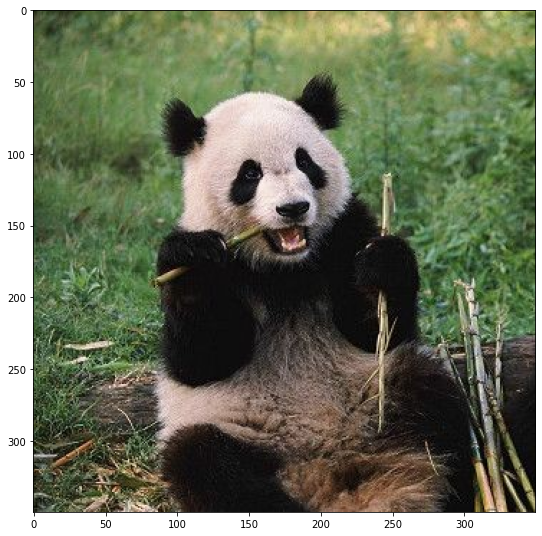

In [18]:
img = plt.imread('data/panda.jpg')
plt.imshow(img)

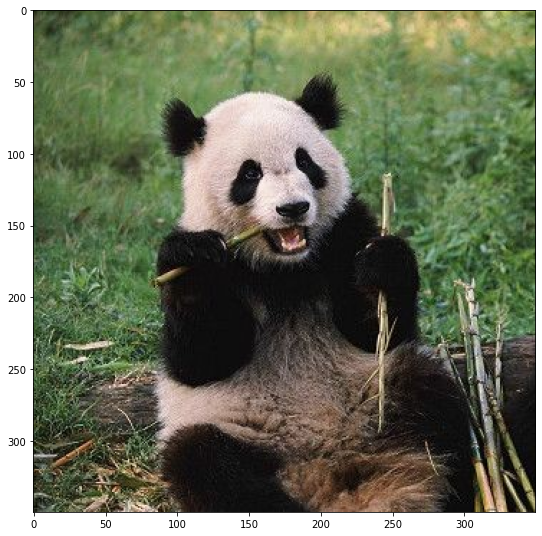

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


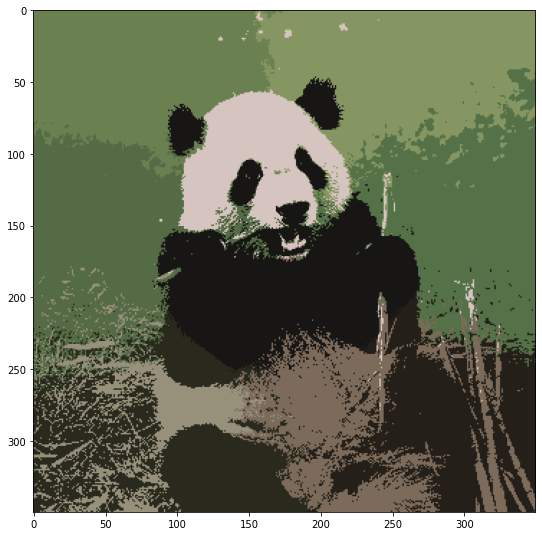

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread, imsave
from sklearn.cluster import KMeans

orig_img = imread('data/panda.jpg')

test = orig_img.copy()

n_color = 10
alpha = 1

alphaxy = [[i*alpha, j*alpha] for i in range(test.shape[0]) for j in range(test.shape[1])]
rgb = test.reshape((-1, test.shape[-1]))
rgbalphaxy = [[*color, *coord] for color, coord in zip(rgb, alphaxy)]


model = KMeans(n_clusters=n_color).fit(rgbalphaxy)
labels = model.labels_
centroids = model.cluster_centers_

plt.imshow(orig_img)
plt.show()

new_img = centroids[labels, 0:3].astype(int).reshape(test.shape)
print(set(labels))
plt.imshow(new_img)

Функия для преобразования изображения в формат RGB(A)XY
- img - исходное изображение
- alpha - коэффициент значимости XY состовляющей

In [20]:
def img_to_rgbxy(img, alpha=1):
    
    xy = [[i*alpha, j*alpha] for i in range(img.shape[0]) for j in range(img.shape[1])]
    rgb = img.reshape((-1, img.shape[-1]))
    rgbxy = [[*color,*coords] for color, coords in zip(rgb, xy)]
    return rgbxy    

#print(img_to_rgbxy(img, 1)[0])

Кластеризация при $\alpha = 1$:

In [21]:
# Параметры кластеризации
n_clusters = 8

# Данные
alpha = 1
data = img_to_rgbxy(img, alpha)

# Модель
model = KMeans(n_clusters).fit(data)
labels = model.labels_
centroids = model.cluster_centers_

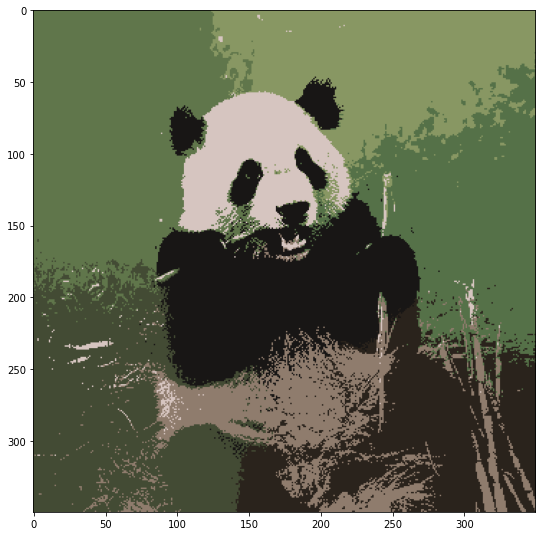

In [21]:
new_img = centroids[labels, 0:3].astype(int).reshape(img.shape)
plt.imshow(new_img)

Кластеризация при $\alpha = 0.8$:

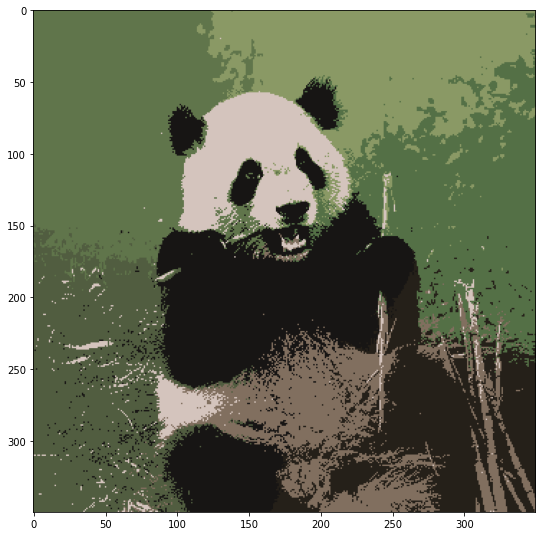

In [22]:
# Параметры кластеризации
n_clusters = 8

# Данные
alpha = 0.8
data = img_to_rgbxy(img, alpha)

# Модель
model = KMeans(n_clusters).fit(data)
labels = model.labels_
centroids = model.cluster_centers_

# Полученное изображение
new_img = centroids[labels, 0:3].astype(int).reshape(img.shape)
plt.imshow(new_img)

Кластеризация при $\alpha = 0.5$:

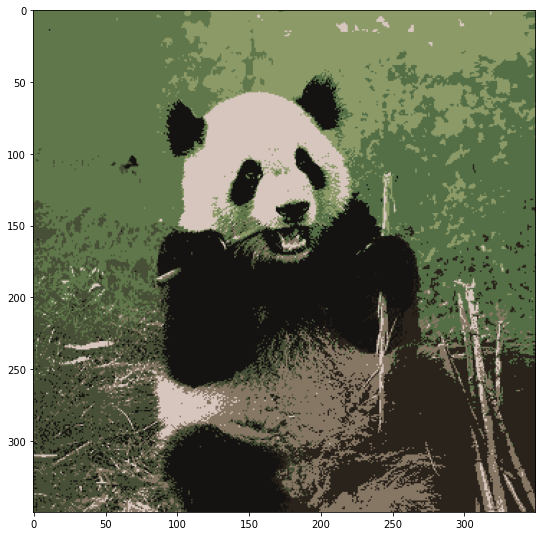

In [23]:
# Параметры кластеризации
n_clusters = 8

# Данные
alpha = 0.5
data = img_to_rgbxy(img, alpha)

# Модель
model = KMeans(n_clusters).fit(data)
labels = model.labels_
centroids = model.cluster_centers_

# Полученное изображение
new_img = centroids[labels, 0:3].astype(int).reshape(img.shape)
plt.imshow(new_img)

Кластеризация при $\alpha = 0.3$:

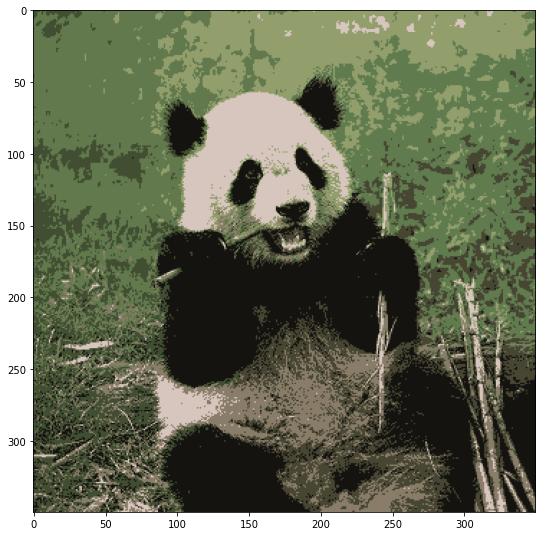

In [24]:
# Параметры кластеризации
n_clusters = 8

# Данные
alpha = 0.3
data = img_to_rgbxy(img, alpha)

# Модель
model = KMeans(n_clusters).fit(data)
labels = model.labels_
centroids = model.cluster_centers_

# Полученное изображение
new_img = centroids[labels, 0:3].astype(int).reshape(img.shape)
plt.imshow(new_img)

Кластеризация при $\alpha = 0.1$:

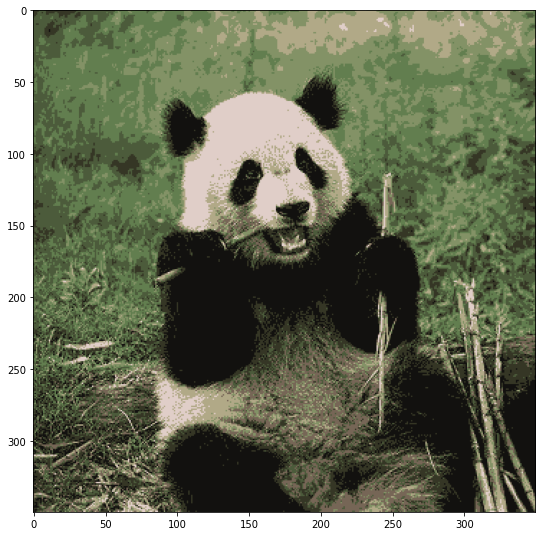

In [25]:
# Параметры кластеризации
n_clusters = 8

# Данные
alpha = 0.1
data = img_to_rgbxy(img, alpha)

# Модель
model = KMeans(n_clusters).fit(data)
labels = model.labels_
centroids = model.cluster_centers_

# Полученное изображение
new_img = centroids[labels, 0:3].astype(int).reshape(img.shape)
plt.imshow(new_img)

Кластеризация при $\alpha = 0$:

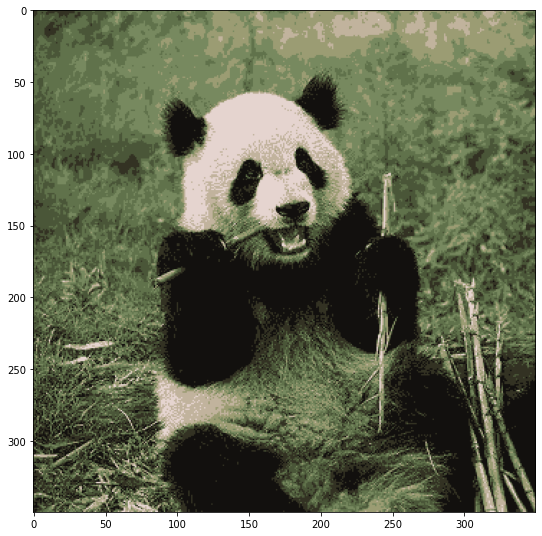

In [26]:
# Параметры кластеризации
n_clusters = 8

# Данные
alpha = 0
data = img_to_rgbxy(img, alpha)

# Модель
model = KMeans(n_clusters).fit(data)
labels = model.labels_
centroids = model.cluster_centers_

# Полученное изображение
new_img = centroids[labels, 0:3].astype(int).reshape(img.shape)
plt.imshow(new_img)